In [152]:
# Logistic Regression using python
# Supervised technique
# prediction is in probabilities 0 to 1
# works with logit function 
# predicts with odd's

import pandas as pd               
cr = pd.read_csv("E:\Data_Science\datasets\CreditRisk.csv")
cr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


In [153]:
cr.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N
980,LP002989,Male,No,0.0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,Y


In [154]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [155]:
cr.isnull().sum()    ##to check the nulls for each columns

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [156]:
# Dealing with nulls
cr.Credit_History = cr.Credit_History.fillna(0)
cr.Self_Employed = cr.Self_Employed.fillna('Yes')
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Dependents = cr.Dependents.fillna(0)
cr.Gender = cr.Gender.fillna('Male')
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.median())
cr.Married = cr.Married.fillna('No')
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [157]:
# Converting the categorical variable into numerical 
cr.Gender.replace({'Male' : 1, 'Female':0}, inplace = True)

In [158]:
# Converting the categorical variable into numerical
cr.Married.replace({'Yes':1,'No':0},inplace = True)

In [159]:
# Converting the categorical variable into numerical
cr.Education.replace({'Graduate':1,'Not Graduate':0},inplace = True)

In [160]:
# Converting categorical variable into numerical
cr.Property_Area.replace({'Semiurban':1,'Urban':2,'Rural':3},inplace = True)

In [161]:
# Converting categorical variable into numerical
cr.Loan_Status.replace({'Y':1,'N':0},inplace = True)

In [162]:
# Converting categorical variable into numerical
cr.Self_Employed.replace({'Yes':1,'No':0},inplace = True)

In [163]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,3,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2,1


In [164]:
# Here sampling results into 4 sampled datasets 2 for Train and 2 for Test
# 2 Train Dataset include 1st : all independent variables also called as x_train 
#                         2nd : a single dependent variable also called as y_train or series

# Spliting data by dependent and independent variable
cr_x = cr.iloc[:, 1:12]     #independent variables
cr_y = cr.iloc[:, -1]       #dependent varaiable
cr_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2
1,1,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,3
2,1,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2
3,1,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2
4,1,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2


In [165]:
# Package for sampling and model building
import sklearn
from sklearn.model_selection import train_test_split

In [166]:
# Sampling on the dataset
cr_x_train,cr_x_test,cr_y_train,cr_y_test = train_test_split(cr_x,cr_y,test_size = .2, random_state = 101)

In [167]:
#importing package for Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(cr_x_train, cr_y_train)

C:\Users\Sony\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [168]:
# Prediction on test data
pred = logmodel.predict(cr_x_test)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [169]:
#importing packege for confision matrix from sklearn
from sklearn.metrics import confusion_matrix
matrix1 = confusion_matrix(pred, cr_y_test)
matrix1

array([[ 28,  16],
       [ 29, 124]], dtype=int64)

In [170]:
# calculating accuracy
acc1 = matrix1.diagonal().sum()/matrix1.sum()
acc1

0.7715736040609137

In [171]:
from  sklearn.metrics import classification_report

In [172]:
a = classification_report(cr_y_test,pred)
a

'              precision    recall  f1-score   support\n\n           0       0.64      0.49      0.55        57\n           1       0.81      0.89      0.85       140\n\n    accuracy                           0.77       197\n   macro avg       0.72      0.69      0.70       197\nweighted avg       0.76      0.77      0.76       197\n'

In [173]:
# prediction in probabilities
pred_prob = logmodel.predict_proba(cr_x_test)
pred_prob
# It results two prediction for each record one for class 0 and one for class 1
# also known as soft voting

array([[0.42898676, 0.57101324],
       [0.11213988, 0.88786012],
       [0.14282107, 0.85717893],
       [0.12900848, 0.87099152],
       [0.76010383, 0.23989617],
       [0.21001787, 0.78998213],
       [0.2159425 , 0.7840575 ],
       [0.31776846, 0.68223154],
       [0.83901028, 0.16098972],
       [0.6083114 , 0.3916886 ],
       [0.23670527, 0.76329473],
       [0.81467517, 0.18532483],
       [0.10064505, 0.89935495],
       [0.14300583, 0.85699417],
       [0.15517676, 0.84482324],
       [0.09553996, 0.90446004],
       [0.07826685, 0.92173315],
       [0.55841617, 0.44158383],
       [0.18698276, 0.81301724],
       [0.23283038, 0.76716962],
       [0.54782511, 0.45217489],
       [0.1023348 , 0.8976652 ],
       [0.1291233 , 0.8708767 ],
       [0.1792456 , 0.8207544 ],
       [0.22782014, 0.77217986],
       [0.29190447, 0.70809553],
       [0.21616951, 0.78383049],
       [0.13647485, 0.86352515],
       [0.52829298, 0.47170702],
       [0.27696764, 0.72303236],
       [0.

In [174]:
from sklearn.metrics import roc_auc_score

In [175]:
from sklearn.metrics import f1_score

In [176]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [181]:
#disp = plot_precision_recall_curve(logmodel, cr_x_test, pred)

In [196]:
precision, recall, threshold = precision_recall_curve(cr_y_test, pred_prob[:,1])


In [197]:
prec1, rec1, th1 = precision_recall_curve(cr_y_test, pred_prob[:,0])

Text(0.5, 1.0, 'precision - Recall')

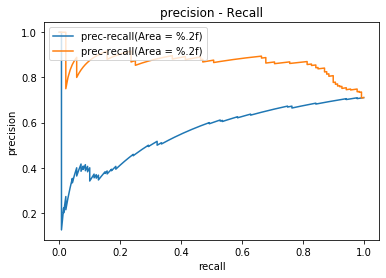

In [198]:
import matplotlib.pyplot as plt

plt.plot(rec1, prec1, label = 'prec-recall(Area = %.2f)')
plt.plot(recall, precision, label = 'prec-recall(Area = %.2f)')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc = 'upper left')
plt.title('precision - Recall')